In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

class ScratchLinearRegression():
    """
    Linear regression scratch implementation
    
    Parameters
    ----------
    num_iter : int
        Number of iterations
    lr : float
        Learning rate
    no_bias : bool
        If True, no bias term is used
    verbose : bool
        If True, the learning process is output
    
    Attributes
    ----------
    self.coef_ : ndarray, shape (n_features,)
        Parameters
    self.loss : ndarray, shape (self.iter,)
        Record of loss for training data
    self.val_loss : ndarray, shape (self.iter,)
        Record of loss for validation data
    """
    
    def __init__(self, num_iter=1000, lr=0.01, no_bias=False, verbose=False):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # Prepare arrays to record loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.coef_ = None
    
    # [Problem 1] Assumption function
    def _linear_hypothesis(self, X):
        """
        Calculate the linear hypothesis function
        
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Training data
        
        Returns
        -------
        ndarray, shape (n_samples,)
            Prediction results using the linear hypothesis function
        """
        return np.dot(X, self.coef_)
    
    # [Problem 2] Gradient Descent
    def _gradient_descent(self, X, error):
        """
        Update parameters using gradient descent
        
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Training data
        error : ndarray, shape (n_samples,)
            Difference between prediction and true value (h_θ(x) - y)
        """
        # Calculate gradient: (1/m) * X^T * (h_θ(x) - y)
        # where m is the number of samples
        m = X.shape[0]
        gradient = (1/m) * np.dot(X.T, error)
        
        # Update parameters: θ := θ - α * gradient
        self.coef_ = self.coef_ - self.lr * gradient
    
    # [Problem 3] Prediction
    def predict(self, X):
        """
        Make predictions using linear regression.
        
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Samples
        Returns
        -------
        ndarray, shape (n_samples,)
            Estimation results from linear regression
        """
        # If no_bias is False, add a column of ones to X for the bias term
        if not self.no_bias:
            X = np.column_stack((np.ones(X.shape[0]), X))
        
        return self._linear_hypothesis(X)
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Train the linear regression model. If validation data is provided,
        calculate loss and accuracy for it at each iteration.
        
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Training data features
        y : ndarray, shape (n_samples,)
            Training data true values
        X_val : ndarray, shape (n_samples, n_features)
            Validation data features
        y_val : ndarray, shape (n_samples,)
            Validation data true values
        """
        # If no_bias is False, add a column of ones to X for the bias term
        if not self.no_bias:
            X = np.column_stack((np.ones(X.shape[0]), X))
            if X_val is not None:
                X_val = np.column_stack((np.ones(X_val.shape[0]), X_val))
        
        # Initialize parameters
        n_features = X.shape[1]
        self.coef_ = np.zeros(n_features)
        
        for i in range(self.iter):
            # [Problem 5] Calculate objective function (loss)
            y_pred = self._linear_hypothesis(X)
            error = y_pred - y
            
            # Update parameters using gradient descent
            self._gradient_descent(X, error)
            
            # Record loss for training data
            self.loss[i] = (1/(2*len(y))) * np.sum(error**2)
            
            # Record loss for validation data if provided
            if X_val is not None and y_val is not None:
                y_val_pred = self._linear_hypothesis(X_val)
                val_error = y_val_pred - y_val
                self.val_loss[i] = (1/(2*len(y_val))) * np.sum(val_error**2)
            
            # Output learning process if verbose is True
            if self.verbose and (i % 100 == 0 or i == self.iter - 1):
                val_loss_str = f", Validation loss: {self.val_loss[i]:.6f}" if X_val is not None else ""
                print(f"Iteration {i}, Loss: {self.loss[i]:.6f}{val_loss_str}")


In [23]:
# [Problem 4] Mean Square Error
def MSE(y_pred, y):
    """
    Calculate Mean Squared Error
    
    Parameters
    ----------
    y_pred : ndarray, shape (n_samples,)
        Predicted values
    y : ndarray, shape (n_samples,)
        True values
    
    Returns
    -------
    mse : float
        Mean Squared Error
    """
    # Calculate the mean of the squared differences
    mse = np.mean((y_pred - y) ** 2)
    return mse


In [24]:
# [Problem 7] Function to plot learning curves
def plot_learning_curve(model, title="Learning Curve"):
    """
    Plot the learning curve for training and validation data
    
    Parameters
    ----------
    model : ScratchLinearRegression
        Trained model with recorded loss
    title : str
        Title of the plot
    """
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(model.loss)), model.loss, label='Training Loss')
    
    # Plot validation loss if it's available
    if np.any(model.val_loss):
        plt.plot(range(len(model.val_loss)), model.val_loss, label='Validation Loss')
    
    plt.title(title)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


In [25]:
# [Problem 6, 8, 9] Functions for verification
def compare_with_sklearn(X_train, y_train, X_test, y_test, no_bias=False, num_iter=1000, lr=0.01):
    """
    Compare our scratch implementation with scikit-learn's LinearRegression
    
    Parameters
    ----------
    X_train, y_train : Training data
    X_test, y_test : Test data
    no_bias : bool
        If True, no bias term is used
    num_iter : int
        Number of iterations for scratch implementation
    lr : float
        Learning rate for scratch implementation
    """
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error
    
    # Our scratch implementation
    scratch_model = ScratchLinearRegression(num_iter=num_iter, lr=lr, no_bias=no_bias, verbose=True)
    scratch_model.fit(X_train, y_train)
    scratch_pred = scratch_model.predict(X_test)
    scratch_mse = MSE(scratch_pred, y_test)
    
    # scikit-learn implementation
    sk_model = LinearRegression(fit_intercept=not no_bias)
    sk_model.fit(X_train, y_train)
    sk_pred = sk_model.predict(X_test)
    sk_mse = mean_squared_error(y_test, sk_pred)
    
    print(f"Scratch model MSE: {scratch_mse:.6f}")
    print(f"Scikit-learn model MSE: {sk_mse:.6f}")
    
    # Plot learning curve
    plot_learning_curve(scratch_model, title=f"Learning Curve (no_bias={no_bias})")
    
    return scratch_model, sk_model

def test_with_polynomial_features(X_train, y_train, X_test, y_test, degrees=[1, 2, 3]):
    """
    Test how polynomial features affect linear regression
    
    Parameters
    ----------
    X_train, y_train : Training data
    X_test, y_test : Test data
    degrees : list of int
        Degrees of polynomial features to test
    """
    from sklearn.preprocessing import PolynomialFeatures
    
    results = []
    
    for degree in degrees:
        print(f"\nTesting with polynomial features of degree {degree}")
        
        # Transform features
        poly = PolynomialFeatures(degree=degree, include_bias=False)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        
        # Train and evaluate
        scratch_model, _ = compare_with_sklearn(
            X_train_poly, y_train, X_test_poly, y_test, 
            no_bias=False, num_iter=2000, lr=0.01
        )
        
        results.append((degree, scratch_model.loss[-1], MSE(scratch_model.predict(X_test_poly), y_test)))
    
    # Compare results
    print("\nComparison of polynomial degrees:")
    print("Degree | Final Training Loss | Test MSE")
    print("--------------------------------------")
    for degree, train_loss, test_mse in results:
        print(f"{degree}      | {train_loss:.6f}          | {test_mse:.6f}")


Training the scratch linear regression model...
Iteration 0, Loss: 19442791762.854877, Validation loss: 19329056242.247181
Iteration 100, Loss: 3027300404.717337, Validation loss: 3446726077.253669
Iteration 200, Loss: 1115032708.992500, Validation loss: 1364218345.516466
Iteration 300, Loss: 844844770.652976, Validation loss: 1022644155.293699
Iteration 400, Loss: 800178854.621891, Validation loss: 946350084.680674
Iteration 500, Loss: 788700936.477714, Validation loss: 918771220.731184
Iteration 600, Loss: 783388199.676402, Validation loss: 903946289.609736
Iteration 700, Loss: 779979033.987072, Validation loss: 894179152.068217
Iteration 800, Loss: 777539418.246333, Validation loss: 887107872.843398
Iteration 900, Loss: 775723365.042343, Validation loss: 881726915.897327
Iteration 1000, Loss: 774342917.373172, Validation loss: 877504693.750248
Iteration 1100, Loss: 773278250.138890, Validation loss: 874120393.588917
Iteration 1200, Loss: 772447877.769289, Validation loss: 871363449.

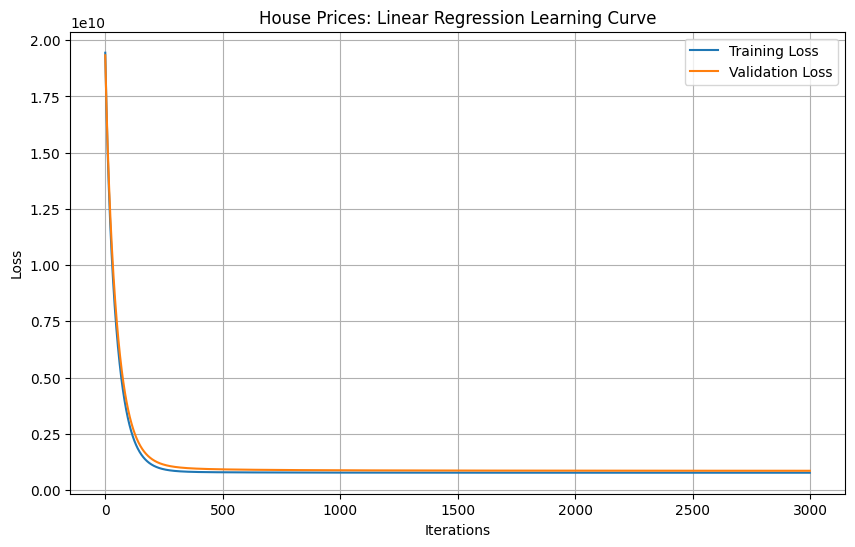

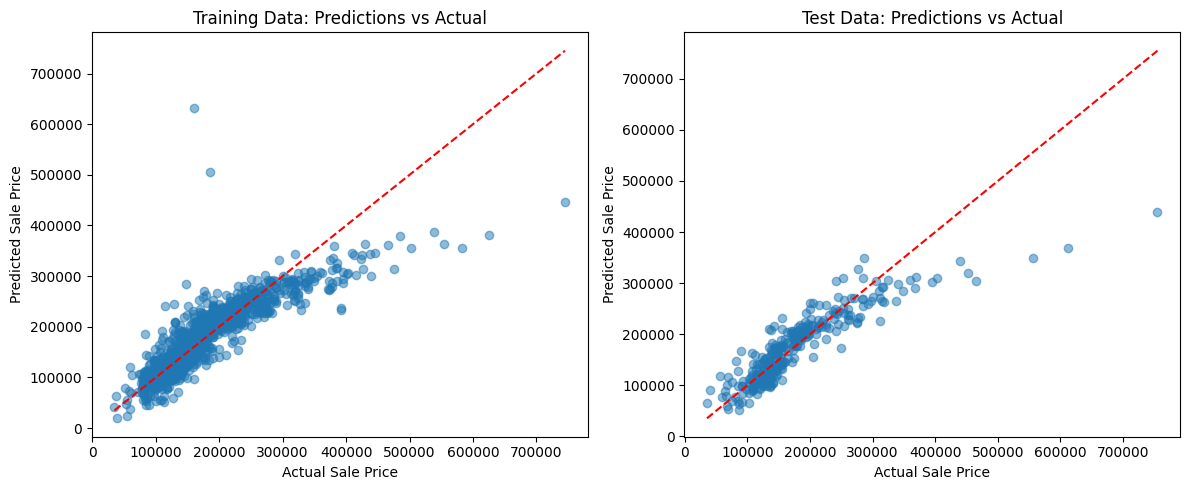

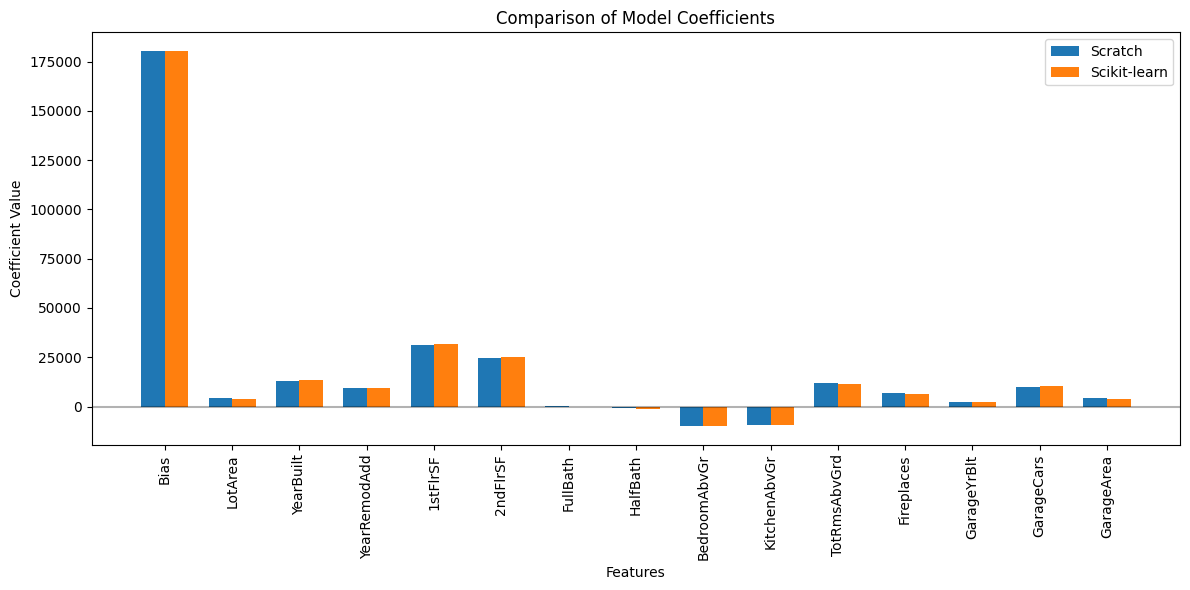


Training the scratch linear regression model without bias term...
Iteration 0, Loss: 19442791762.854877, Validation loss: 19652351534.194527
Iteration 100, Loss: 17070293929.296726, Validation loss: 18099849339.708096
Iteration 200, Loss: 17036560626.040199, Validation loss: 18064440765.988087
Iteration 300, Loss: 17022287404.354458, Validation loss: 18036602991.746033
Iteration 400, Loss: 17014309095.926466, Validation loss: 18017129265.071754
Iteration 500, Loss: 17009313782.996050, Validation loss: 18002875834.186481
Iteration 600, Loss: 17005941033.349993, Validation loss: 17992085759.389412
Iteration 700, Loss: 17003530245.184399, Validation loss: 17983740648.414791
Iteration 800, Loss: 17001730544.730328, Validation loss: 17977196021.678394
Iteration 900, Loss: 17000342671.190937, Validation loss: 17972013069.440071
Iteration 1000, Loss: 16999246632.610561, Validation loss: 17967878270.201057
Iteration 1100, Loss: 16998366114.253771, Validation loss: 17964560770.921684
Iteration

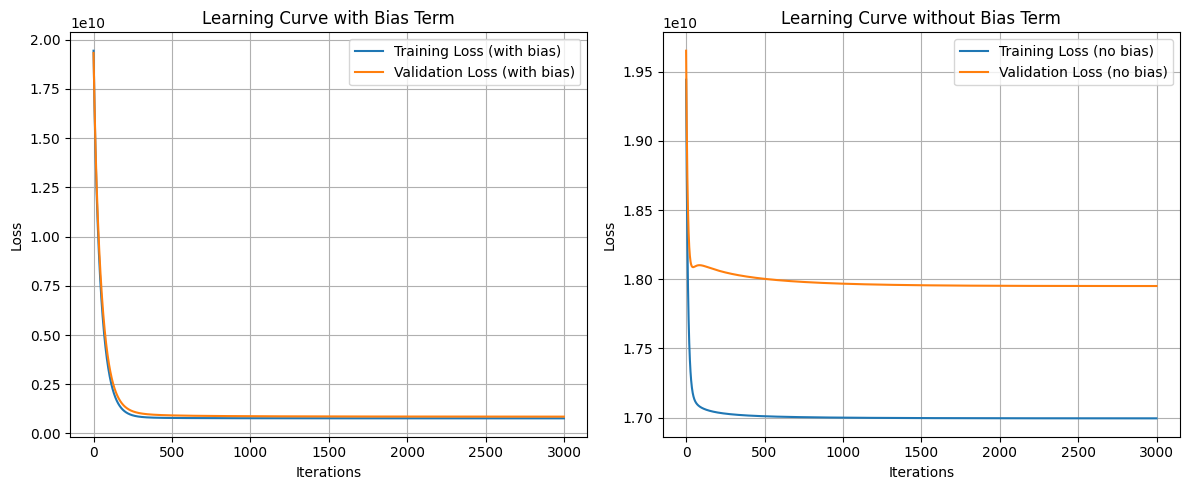

In [27]:
# Load the House Prices dataset
def load_house_prices_data(file_path='train.csv'):
    """
    Load and preprocess the House Prices dataset from Kaggle
    
    Parameters
    ----------
    file_path : str
        Path to the train.csv file
    
    Returns
    -------
    X_train, X_test, y_train, y_test : Preprocessed and split dataset
    """
    df = pd.read_csv(file_path)
    
    # Define the target variable
    y = df['SalePrice'].values
    
    # select some numerical features for simplicity
    numerical_features = [
        'LotArea', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 
        'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 
        'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea'
    ]
    
    # Handle missing values in numerical features by filling with median
    X = df[numerical_features].copy()
    for col in X.columns:
        X[col] = X[col].fillna(X[col].median())
    
    # Convert to numpy array
    X = X.values
    
    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test, numerical_features

# Load the data
X_train, X_test, y_train, y_test, features = load_house_prices_data()

# [Problem 6] Train and evaluate our scratch implementation
print("Training the scratch linear regression model...")
scratch_model = ScratchLinearRegression(num_iter=3000, lr=0.01, verbose=True)
scratch_model.fit(X_train, y_train, X_val=X_test, y_val=y_test)

# Make predictions
scratch_train_pred = scratch_model.predict(X_train)
scratch_test_pred = scratch_model.predict(X_test)

# Calculate metrics
scratch_train_mse = MSE(scratch_train_pred, y_train)
scratch_test_mse = MSE(scratch_test_pred, y_test)
scratch_train_r2 = r2_score(y_train, scratch_train_pred)
scratch_test_r2 = r2_score(y_test, scratch_test_pred)

# Train scikit-learn model for comparison
print("\nTraining the scikit-learn linear regression model...")
sk_model = LinearRegression()
sk_model.fit(X_train, y_train)

# Make predictions with scikit-learn model
sk_train_pred = sk_model.predict(X_train)
sk_test_pred = sk_model.predict(X_test)

# Calculate metrics for scikit-learn model
sk_train_mse = mean_squared_error(y_train, sk_train_pred)
sk_test_mse = mean_squared_error(y_test, sk_test_pred)
sk_train_r2 = r2_score(y_train, sk_train_pred)
sk_test_r2 = r2_score(y_test, sk_test_pred)

# Display the comparison results
print("\n===== Performance Comparison =====")
print(f"Scratch Implementation:")
print(f"  - Training MSE: {scratch_train_mse:.2f}")
print(f"  - Test MSE: {scratch_test_mse:.2f}")
print(f"  - Training R²: {scratch_train_r2:.4f}")
print(f"  - Test R²: {scratch_test_r2:.4f}")
print(f"\nScikit-learn Implementation:")
print(f"  - Training MSE: {sk_train_mse:.2f}")
print(f"  - Test MSE: {sk_test_mse:.2f}")
print(f"  - Training R²: {sk_train_r2:.4f}")
print(f"  - Test R²: {sk_test_r2:.4f}")

# Plot the learning curve
plot_learning_curve(scratch_model, title="House Prices: Linear Regression Learning Curve")

# Visualize predictions vs actual
plt.figure(figsize=(12, 5))

# Scatter plot for training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, scratch_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Training Data: Predictions vs Actual')

# Scatter plot for test data
plt.subplot(1, 2, 2)
plt.scatter(y_test, scratch_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Test Data: Predictions vs Actual')

plt.tight_layout()
plt.show()

# Compare coefficients
scratch_coef = scratch_model.coef_
sk_coef = np.insert(sk_model.coef_, 0, sk_model.intercept_)  # Add intercept to match scratch format

plt.figure(figsize=(12, 6))
coef_names = ['Bias'] + features if not scratch_model.no_bias else features
x = np.arange(len(coef_names))
width = 0.35

plt.bar(x - width/2, scratch_coef, width, label='Scratch')
plt.bar(x + width/2, sk_coef, width, label='Scikit-learn')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)

plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Model Coefficients')
plt.xticks(x, coef_names, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# [Problem 8] Test without bias term
print("\nTraining the scratch linear regression model without bias term...")
scratch_model_no_bias = ScratchLinearRegression(num_iter=3000, lr=0.01, no_bias=True, verbose=True)
scratch_model_no_bias.fit(X_train, y_train, X_val=X_test, y_val=y_test)

# Make predictions
scratch_test_pred_no_bias = scratch_model_no_bias.predict(X_test)
scratch_test_mse_no_bias = MSE(scratch_test_pred_no_bias, y_test)
scratch_test_r2_no_bias = r2_score(y_test, scratch_test_pred_no_bias)

print("\n===== Impact of Bias Term =====")
print(f"With bias term:")
print(f"  - Test MSE: {scratch_test_mse:.2f}")
print(f"  - Test R²: {scratch_test_r2:.4f}")
print(f"Without bias term:")
print(f"  - Test MSE: {scratch_test_mse_no_bias:.2f}")
print(f"  - Test R²: {scratch_test_r2_no_bias:.4f}")

# Plot the learning curves for comparison
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(len(scratch_model.loss)), scratch_model.loss, label='Training Loss (with bias)')
plt.plot(range(len(scratch_model.val_loss)), scratch_model.val_loss, label='Validation Loss (with bias)')
plt.title('Learning Curve with Bias Term')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(len(scratch_model_no_bias.loss)), scratch_model_no_bias.loss, label='Training Loss (no bias)')
plt.plot(range(len(scratch_model_no_bias.val_loss)), scratch_model_no_bias.val_loss, label='Validation Loss (no bias)')
plt.title('Learning Curve without Bias Term')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [28]:
# [Problem 11] Explanation about local optima in linear regression with visualizations

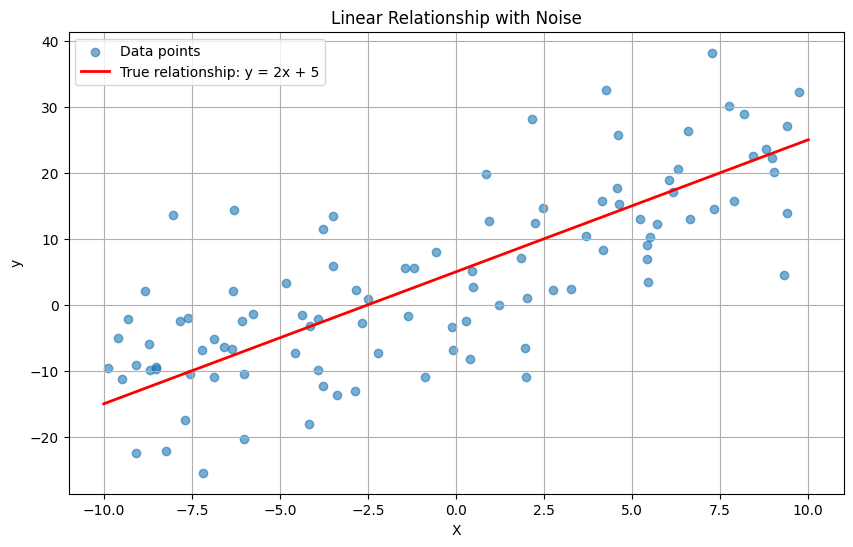

In [29]:

def generate_linear_data(n=100, noise=10, seed=42):
    np.random.seed(seed)
    X = np.random.uniform(-10, 10, n)
    y = 2*X + 5 + np.random.normal(0, noise, n)
    return X.reshape(-1, 1), y

# Generate our dataset
X, y = generate_linear_data()

# 1. Visualize the data and the true relationship
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, label='Data points')
plt.plot([-10, 10], [2*(-10) + 5, 2*10 + 5], 'r-', linewidth=2, label='True relationship: y = 2x + 5')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Relationship with Noise')
plt.legend()
plt.grid(True)
plt.show()


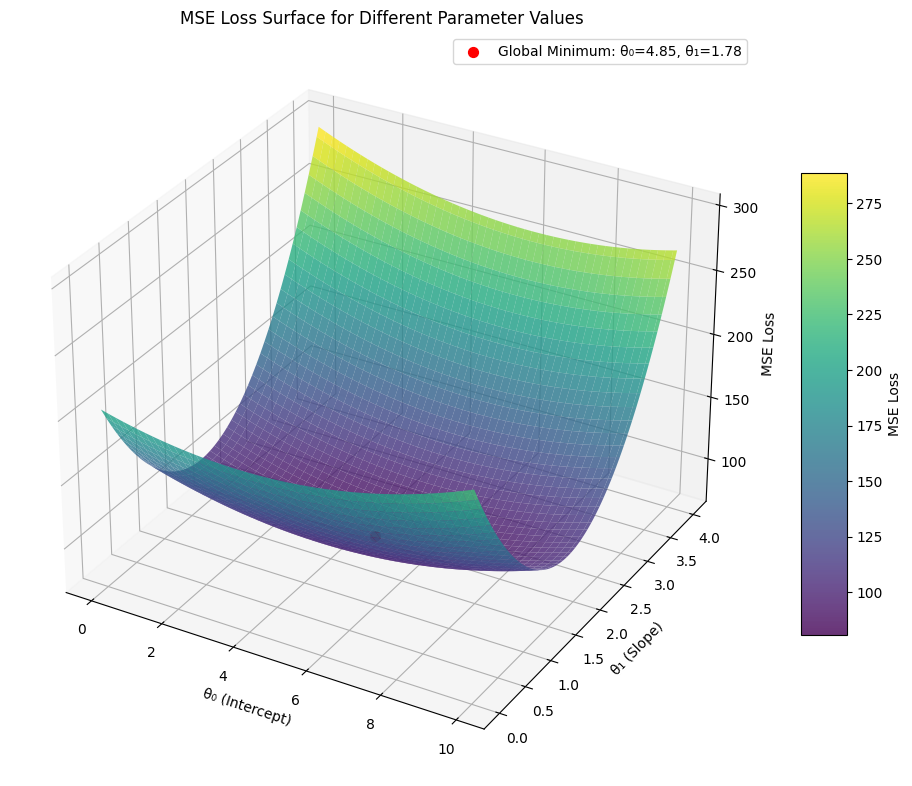

In [30]:
# 2. Visualize the MSE loss function surface for different parameter values (θ0, θ1)
#parameter space
theta0_range = np.linspace(0, 10, 100)
theta1_range = np.linspace(0, 4, 100)
theta0_grid, theta1_grid = np.meshgrid(theta0_range, theta1_range)

# Compute the MSE loss for each parameter combination
mse_values = np.zeros_like(theta0_grid)

for i in range(len(theta0_range)):
    for j in range(len(theta1_range)):
        theta0 = theta0_range[i]
        theta1 = theta1_range[j]
        
        # Make predictions with these parameters
        y_pred = theta0 + theta1 * X.flatten()
        
        # Calculate MSE
        mse_values[j, i] = np.mean((y_pred - y) ** 2)

# Plot the 3D surface
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(theta0_grid, theta1_grid, mse_values, cmap=cm.viridis, alpha=0.8)

# Customize the plot
ax.set_xlabel('θ₀ (Intercept)')
ax.set_ylabel('θ₁ (Slope)')
ax.set_zlabel('MSE Loss')
ax.set_title('MSE Loss Surface for Different Parameter Values')

# Add a color bar to show the loss values
fig.colorbar(surface, ax=ax, shrink=0.6, aspect=10, label='MSE Loss')

# Highlight the minimum point
min_idx = np.unravel_index(np.argmin(mse_values), mse_values.shape)
min_theta0 = theta0_range[min_idx[1]]
min_theta1 = theta1_range[min_idx[0]]
min_loss = mse_values[min_idx]

ax.scatter([min_theta0], [min_theta1], [min_loss], color='red', s=50, label=f'Global Minimum: θ₀={min_theta0:.2f}, θ₁={min_theta1:.2f}')
ax.legend()

plt.show()

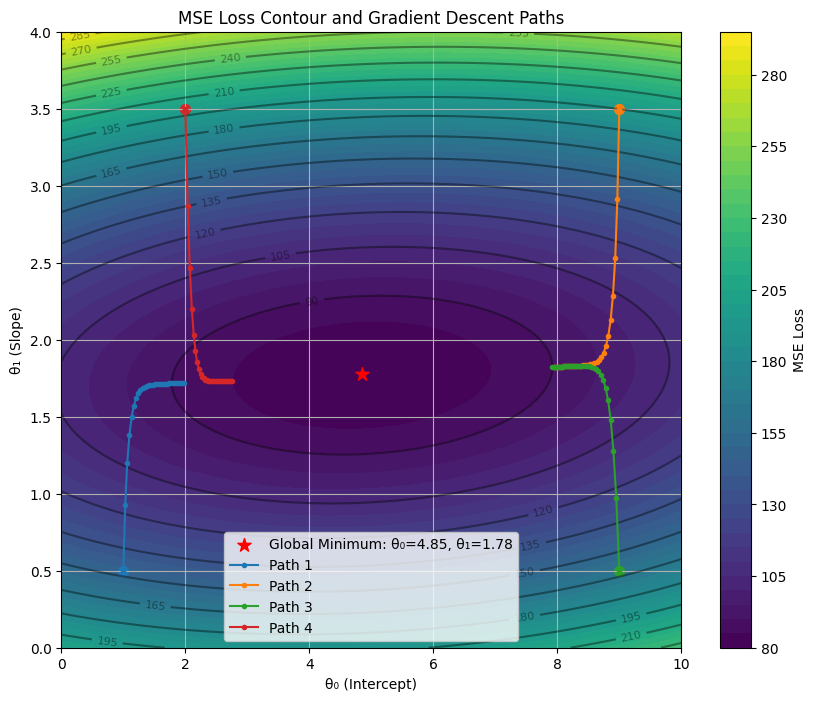

In [31]:
# 3. Show contour plot (2D view from above) to better visualize the convex shape
plt.figure(figsize=(10, 8))
contour = plt.contourf(theta0_grid, theta1_grid, mse_values, 50, cmap='viridis')
plt.colorbar(contour, label='MSE Loss')

# Add contour lines for clearer visualization
contour_lines = plt.contour(theta0_grid, theta1_grid, mse_values, 20, colors='k', alpha=0.4)
plt.clabel(contour_lines, inline=True, fontsize=8)

# Mark the minimum point
plt.scatter([min_theta0], [min_theta1], color='red', s=100, marker='*', label=f'Global Minimum: θ₀={min_theta0:.2f}, θ₁={min_theta1:.2f}')

# Plot gradient descent path from different starting points
def gradient_descent_path(start_theta0, start_theta1, lr=0.01, iterations=30):
    theta0, theta1 = start_theta0, start_theta1
    path = [(theta0, theta1)]
    
    for _ in range(iterations):
        # Compute the gradients
        y_pred = theta0 + theta1 * X.flatten()
        error = y_pred - y
        
        # Gradient for theta0 (bias term): (1/m) * sum(error)
        grad_theta0 = np.mean(error)
        
        # Gradient for theta1 (slope): (1/m) * sum(error * X)
        grad_theta1 = np.mean(error * X.flatten())
        
        # Update parameters
        theta0 = theta0 - lr * grad_theta0
        theta1 = theta1 - lr * grad_theta1
        
        path.append((theta0, theta1))
    
    return np.array(path)

# Plot paths from different starting points
starting_points = [
    (1, 0.5, 'Path 1'),
    (9, 3.5, 'Path 2'),
    (9, 0.5, 'Path 3'),
    (2, 3.5, 'Path 4')
]

for start_theta0, start_theta1, label in starting_points:
    path = gradient_descent_path(start_theta0, start_theta1)
    plt.plot(path[:, 0], path[:, 1], 'o-', linewidth=1.5, markersize=3, label=label)
    plt.scatter([start_theta0], [start_theta1], s=50)

plt.xlabel('θ₀ (Intercept)')
plt.ylabel('θ₁ (Slope)')
plt.title('MSE Loss Contour and Gradient Descent Paths')
plt.legend()
plt.grid(True)
plt.show()


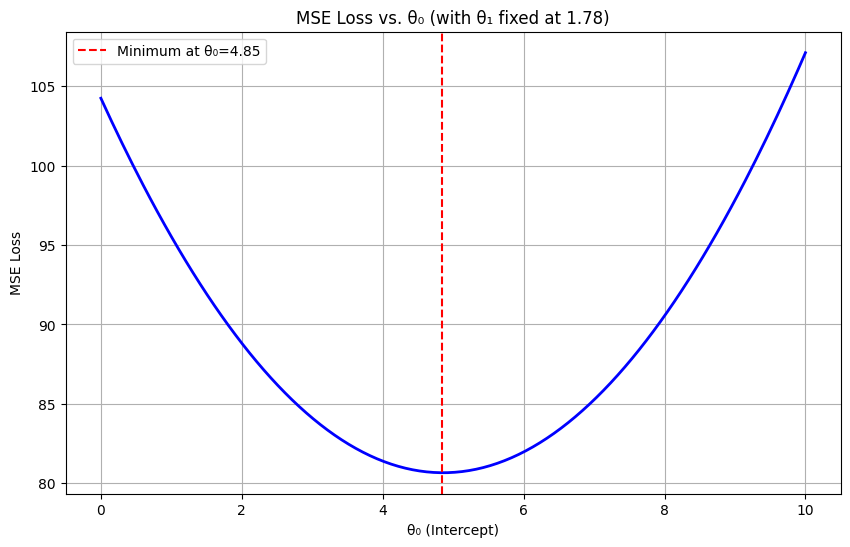

In [32]:
# 4. Create a 1D slice of the loss function to show it's convex along any direction
# take a slice where theta1 is fixed at the optimal value
fixed_theta1 = min_theta1
theta0_values = np.linspace(0, 10, 200)
mse_slice = np.zeros_like(theta0_values)

for i, theta0 in enumerate(theta0_values):
    y_pred = theta0 + fixed_theta1 * X.flatten()
    mse_slice[i] = np.mean((y_pred - y) ** 2)

plt.figure(figsize=(10, 6))
plt.plot(theta0_values, mse_slice, 'b-', linewidth=2)
plt.axvline(x=min_theta0, color='r', linestyle='--', label=f'Minimum at θ₀={min_theta0:.2f}')
plt.xlabel('θ₀ (Intercept)')
plt.ylabel('MSE Loss')
plt.title(f'MSE Loss vs. θ₀ (with θ₁ fixed at {fixed_theta1:.2f})')
plt.grid(True)
plt.legend()
plt.show()

# 5. Explanation using mathematical formulas
print("""
# Explanation of Why Linear Regression Has No Local Optima Problem

## The Linear Regression Model
The linear regression model with parameters θ is defined as:
h_θ(x) = θ₀ + θ₁x₁ + θ₂x₂ + ... + θₙxₙ

In matrix form:
h_θ(x) = X·θ

Where:
- X is the design matrix (features)
- θ is the parameter vector

## The Objective Function (Loss Function)
The Mean Squared Error (MSE) loss function for linear regression is:
J(θ) = (1/2m) Σ (h_θ(x⁽ⁱ⁾) - y⁽ⁱ⁾)²

Expanding this:
J(θ) = (1/2m) Σ (X·θ - y)²
J(θ) = (1/2m) (X·θ - y)ᵀ(X·θ - y)

## The Gradient of the Loss Function
The gradient of the loss function with respect to θ is:
∇J(θ) = (1/m) Xᵀ(X·θ - y)

## Convexity of the Loss Function
A function is convex if its Hessian matrix (matrix of second derivatives) is positive semi-definite.

The Hessian of J(θ) is:
H = (1/m) XᵀX

Since XᵀX is positive semi-definite (all eigenvalues are non-negative), the loss function J(θ) is convex.

## Properties of Convex Functions
1. A convex function has only one minimum, which is the global minimum
2. Any local minimum of a convex function is also the global minimum
3. The gradient descent algorithm will always converge to the global minimum for a convex function (with an appropriate learning rate)

## Conclusion
The linear regression loss function is convex because:
1. The prediction function h_θ(x) is linear in the parameters θ
2. The squared error (h_θ(x) - y)² is a convex function
3. The sum of convex functions is convex

Therefore, gradient descent is guaranteed to find the global minimum of the loss function, and there is no problem with local optima in linear regression.

The visualizations above demonstrate this convexity and how gradient descent always converges to the same optimal solution regardless of the starting point.
""")